In [1]:
import sys
sys.path.append('/home/williamn/.conda/envs/ML-conda-env/lib/python3.11/site-packages')

from Data_Input import Input_Data, leaderboard_data
from Data_Processing import Basic_FE, xg_FE
from Data_Splitting import train_test, train_test_val
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#If things aren't working, restart kernel to force it to update imports
#because python is dumb!

In [8]:
# Inputs and processes data
data = Input_Data()
p_data = Basic_FE(data)
#processed_data.info()


In [9]:
#Splits and resamples data
#split = train_test_val(p_data, 0.2,0.1)
split = train_test(p_data, 0.2)
split.resample()

In [11]:
#Fits and tests data

# Basic Idea
Make assumptions (feature engineering, what else..?)
Run models (test assumptions)

In [20]:
# Do different ML systems in separate files
# Make a submission file as well
# Bootstrapping option
# Make ML model class to interface with rest of stuff




#Basic structure:

#X_test Y_test X_train_ Y_train

#import model1 from model1
#import model2 from model2
#
#models = [model1,model2,]
#
# for model in models:
# model1(processed_data) (prints data)

# Random Forest 

In [35]:
# random forest with random undersampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
#make data easier to work with
X = split.trainx
y = split.trainy
Xtest = split.testx
ytest = split.testy


In [68]:
# Setting up hyperparameters (HP's)
# Each comment and accompanying initalization defines a hyperparameter (HP) used for the construction of the model
# to include a HP delete the '##' at the beginning of the line used for the initialization of the HP 
# to exclude a HP add '##' at the beginning of the initialization line for the HP
# to add a new HP follow the convention described above and shown below
# WARNING: will need to update param grid if changes are made to prevent errors

# Number of trees in the random forest 
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 6)]

# Criterion used to determine quality of the split 
## criterion = ['gini', 'entropy']

# Max depth of the tree
max_depth = [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)]

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 10, num = 3)]

# Minimum number of samples required for there to be a lead at a node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 3)]

# Minimum weighted fractions of the sum total of all weights requried for there to be a leaf at a node
##

# Number of features considered when looking for the best split
max_features = ['sqrt', 'log2']

# Whether or not to bootstrap samples (certainly should always be done for our data set, but left here as an option)
## bootstrap = [True, False]


In [69]:
# Creating a parameter grid 
random_grid = {'n_estimators' : n_estimators,
              'max_depth'  : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_features' : max_features}

print(random_grid)

{'n_estimators': [50, 240, 430, 620, 810, 1000], 'max_depth': [4, 8], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'max_features': ['sqrt', 'log2']}


In [70]:
# define model
## model = BalancedRandomForestClassifier()
model = BalancedRandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = model, param_grid = random_grid, cv = 5, verbose = 2, n_jobs=4)

In [72]:
rf_Grid.fit(X, y)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


GridSearchCV(cv=2, estimator=BalancedRandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [4, 8], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 240, 430, 620, 810, 1000]},
             verbose=2)

In [67]:

y_pred = rf_Grid.predict(Xtest)
print(f"Balanced accuracy: {balanced_accuracy_score(ytest, y_pred > 0.5)}")

Balanced accuracy: 0.7782139589176853


# AdaBoost

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix

# Create AdaBoostClassifier with DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Decision Stump
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)
adaboost.fit(split.trainx, split.trainy, )


# Predict on the test data
y_pred = adaboost.predict(split.testx)

# Calculate the accuracy
accuracy = accuracy_score(split.testy, y_pred)
print(f"Accuracy: {accuracy:.2f}")# Calculate the accuracy
accuracy = accuracy_score(split.testy, y_pred)
# confusion matrix
print(confusion_matrix(split.testy, y_pred > .5))
print(f"Accuracy: {accuracy:.2f}")
print(
    f"Balanced Accuracy: {balanced_accuracy_score(split.testy, y_pred > .5)}"
)

Accuracy: 0.72


In [34]:
from sklearn.ensemble import GradientBoostingClassifier  # For classification tasks
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix

gboost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gboost.fit(split.trainx, split.trainy)

y_pred = gboost.predict(split.testx)

accuracy = accuracy_score(split.testy, y_pred)
print(f"Accuracy: {accuracy:.2f}")# Calculate the accuracy
accuracy = accuracy_score(split.testy, y_pred)
# confusion matrix
print(confusion_matrix(split.testy, y_pred > .5))
print(f"Accuracy: {accuracy:.2f}")
print(
    f"Balanced Accuracy: {balanced_accuracy_score(split.testy, y_pred > .5)}"
)
#150 estimators, depth = 1, LR=0.05: BA = 0.781
#150 estimators, depth = 1, LR=0.03, BA = 0.776
#150 estimators, depth = 1, LR=0.05, BA = 0.78?
#200 estimators, depth = 1, LR=0.05, BA = 0.782
#150 estimators, depth = 2, LR=0.05, BA = 0.779
#120 estimators, depth = 3, LR=0.10, BA = 0.781
#120 estimators, depth = 6, LR=0.10, BA = 0.709
#200 estimators, depth = 3, LR=0.10, BA = 0.785

ValueError: could not convert string to float: 'basal'

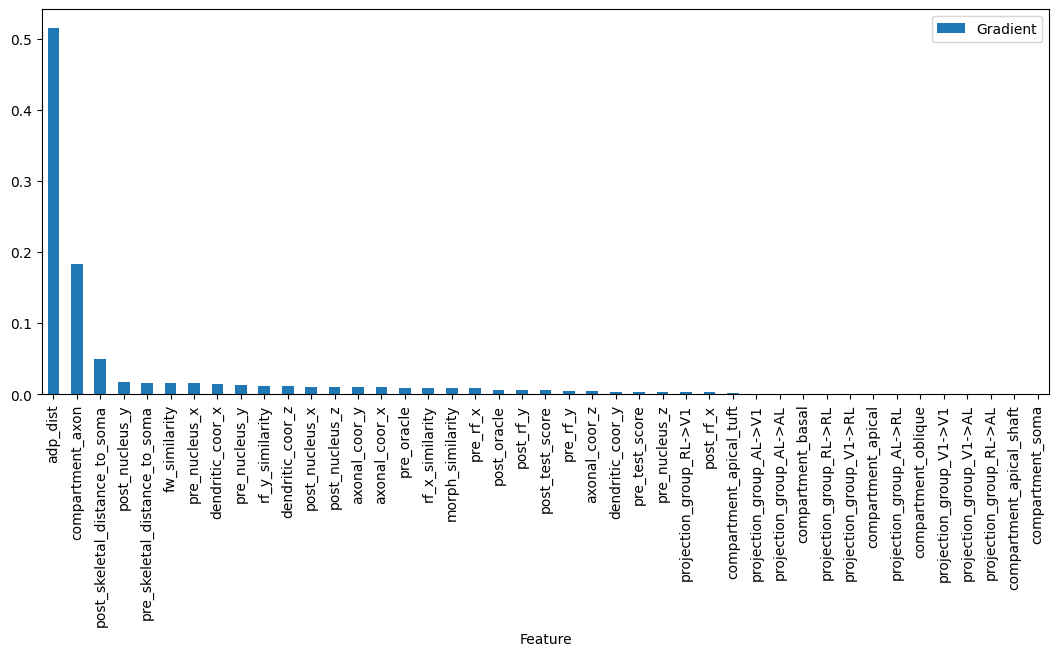

In [17]:
feature_importance = pd.DataFrame({'Feature':split.trainx.columns,'Gradient':gboost.feature_importances_})
feature_importance = feature_importance.set_index('Feature').sort_values(by='Gradient', ascending = False)
feature_importance = feature_importance/feature_importance.sum()
feature_importance.plot.bar(figsize=(13,5))
plt.show()

# XGboost

In [2]:
# XGboost process and splitting

# Inputs and processes data
data = Input_Data()
p_data = xg_FE(data)
#processed_data.info()
#Splits and resamples data
#split = train_test_val(p_data, 0.2,0.1)
split = train_test(p_data, 0.2)
split.resample()

In [3]:
#p_data["compartment"] = p_data["compartment"].astype("category")
p_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144853 entries, 6 to 185830
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   axonal_coor_x                   144853 non-null  int64   
 1   axonal_coor_y                   144853 non-null  int64   
 2   axonal_coor_z                   144853 non-null  int64   
 3   dendritic_coor_x                144853 non-null  int64   
 4   dendritic_coor_y                144853 non-null  int64   
 5   dendritic_coor_z                144853 non-null  int64   
 6   adp_dist                        144853 non-null  float64 
 7   post_skeletal_distance_to_soma  144853 non-null  float64 
 8   pre_skeletal_distance_to_soma   144853 non-null  float64 
 9   pre_oracle                      144853 non-null  float64 
 10  pre_test_score                  144853 non-null  float64 
 11  pre_rf_x                        144853 non-null  float64 
 12  pr

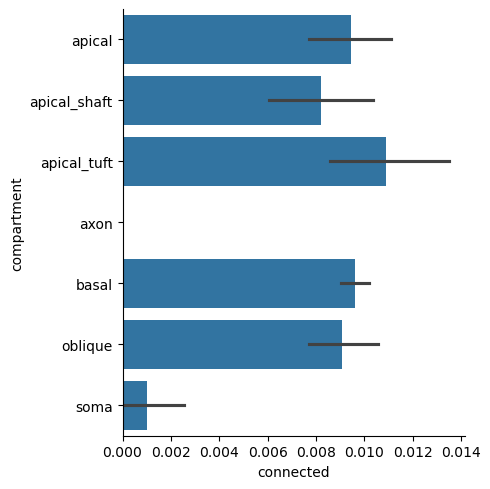

In [4]:
sns.catplot(data=p_data, x='connected', y='compartment', kind='bar')

In [8]:
p_data[p_data['compartment']=='axon'][p_data['connected']==True]

/tmp/ipykernel_18215/1649215541.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_data[p_data['compartment']=='axon'][p_data['connected']==True]


,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,pre_oracle,...,post_nucleus_y,post_nucleus_z,connected,fw_similarity,morph_similarity,rf_x_similarity,rf_y_similarity,compartment,pre_brain_area,post_brain_area
86867,709695,790335,749259,710200,790233,748811,586.858,140852.0,458033.0,0.911875,...,661120,742520,True,0.025957,0.389100,43.346436,72.903471,axon,V1,RL
101311,1037420,783867,964320,1037740,783177,964512,562.352,374982.0,864605.0,0.952224,...,527936,932840,True,0.187078,0.864355,19.962782,1.913295,axon,V1,RL


In [7]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144853 entries, 6 to 185830
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   axonal_coor_x                   144853 non-null  int64   
 1   axonal_coor_y                   144853 non-null  int64   
 2   axonal_coor_z                   144853 non-null  int64   
 3   dendritic_coor_x                144853 non-null  int64   
 4   dendritic_coor_y                144853 non-null  int64   
 5   dendritic_coor_z                144853 non-null  int64   
 6   adp_dist                        144853 non-null  float64 
 7   post_skeletal_distance_to_soma  144853 non-null  float64 
 8   pre_skeletal_distance_to_soma   144853 non-null  float64 
 9   pre_oracle                      144853 non-null  float64 
 10  pre_test_score                  144853 non-null  float64 
 11  pre_rf_x                        144853 non-null  float64 
 12  pr

In [32]:
#XGBoost

# Try the subsampling, bootstrapping, Hessian
# Import the path?
# Try to make custom eval_metric?

import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, mean_absolute_error


# Train a model using the scikit-learn API

#xgb_classifier = xgb.XGBClassifier(n_estimators=60, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
#1000, hist, 0.005, 4
xgb_classifier = xgb.XGBClassifier(n_estimators=2000,
                                   objective='binary:logistic',
                                   tree_method='hist',
                                   eta=0.05,
                                   max_depth=2,
                                   enable_categorical=True,
                                   verbosity=1,
                                   eval_metric = balanced_accuracy_score,
                                  )
xgb_classifier.fit(split.trainx, split.trainy)

y_pred = xgb_classifier.predict(split.testx)

accuracy = accuracy_score(split.testy, y_pred)
print(f"Accuracy: {accuracy:.2f}")# Calculate the accuracy
accuracy = accuracy_score(split.testy, y_pred)
# confusion matrix
print(confusion_matrix(split.testy, y_pred > .5))
print(f"Accuracy: {accuracy:.2f}")
print(
    f"Balanced Accuracy: {balanced_accuracy_score(split.testy, y_pred > .5)}"
)

# Convert the model to a native API model
model = xgb_classifier.get_booster()

Accuracy: 0.79
[[22599  6098]
 [   89   185]]
Accuracy: 0.79
Balanced Accuracy: 0.7313432010111182


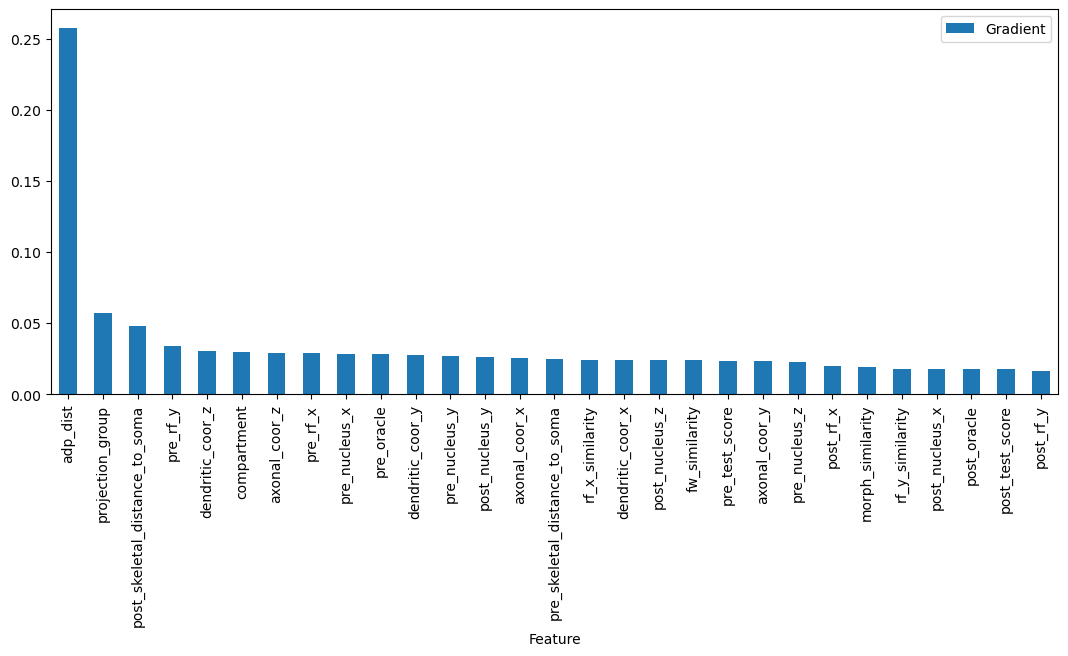

In [33]:
feature_importance = pd.DataFrame({'Feature':split.trainx.columns,'Gradient':xgb_classifier.feature_importances_})
feature_importance = feature_importance.set_index('Feature').sort_values(by='Gradient', ascending = False)
feature_importance = feature_importance/feature_importance.sum()
feature_importance.plot.bar(figsize=(13,5))
plt.show()

In [93]:
lb_data = leaderboard_data()
#Adjust data

# Submission

In [94]:
# Submission

IDs = lb_data["ID"]
#lb_data = Basic_FE(lb_data)
lb_data = xg_FE(lb_data)
# oversample connected neuron pairs for full training data

data = Input_Data()
#train_data = Basic_FE(data)
train_data = xg_FE(data)
train_data = train_test(train_data)
train_data.resample()

# fit model
#adaboost.fit(train_data.trainx, train_data.trainy)
#gboost.fit(train_data.trainx, train_data.trainy)
xgb_classifier.fit(train_data.trainx, train_data.trainy)

# predict on leaderboard data
#lb_data["pred"] = pipe.predict_proba(lb_data[["fw_similarity", "adp_dist"]])[:, 1]
#lb_data["pred"] = gboost.predict(lb_data)
lb_data["pred"] = xgb_classifier.predict(lb_data)
lb_data["ID"]=IDs

#create a boolean prediction solution
lb_data["connected"] = lb_data["pred"] > .5

#columns should be ID, connected
submission_data = lb_data.filter(['ID','connected'])
submission_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42593 entries, 0 to 42592
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         42593 non-null  int64
 1   connected  42593 non-null  bool 
dtypes: bool(1), int64(1)
memory usage: 707.1 KB


In [95]:
#writing csv files
submission_data.to_csv('tbd8.csv',index=False)